Anzahl Cluster: 4


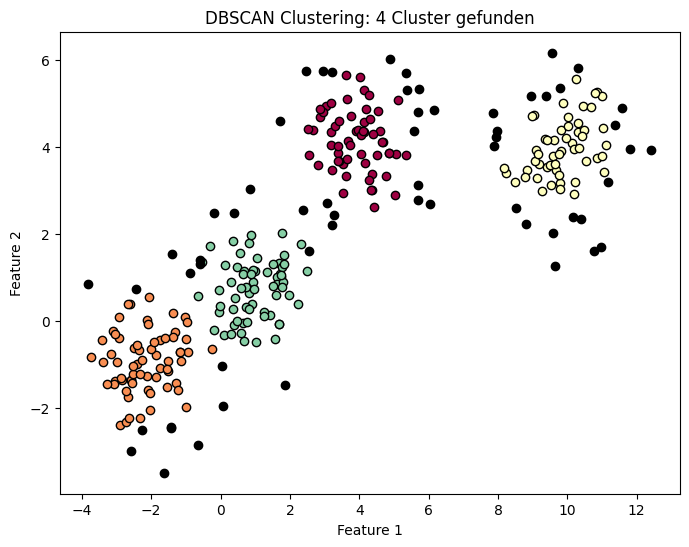

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 1. Künstliche Daten generieren
X, _ = make_blobs(n_samples=300, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]],
                  cluster_std=0.9, random_state=0)

# 2. DBSCAN-Algorithmus anwenden
# Parameter:
# - eps: maximaler Abstand für Nachbarschaft
# - min_samples: Mindestanzahl von Punkten in der Nachbarschaft für einen Kernpunkt
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_

# 3. Anzahl der Cluster ermitteln (Label -1 steht für Rauschen)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Anzahl Cluster:", n_clusters)

# 4. Ergebnisse visualisieren
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Rauschpunkte (Outlier) in schwarz darstellen
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering: {} Cluster gefunden'.format(n_clusters))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()